In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data and Check Input

In [19]:
dt = 0.01

annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2021\\1117\\SplitData\\diode_repeat_WhiteNoise_mean=10_C=0.2_17-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000

TicTocer = annots['a_data'][1]
startTime = np.where(TicTocer>38000)[0][0]/sampling_rate
endTime = np.where(TicTocer>38000)[0][-1]/sampling_rate+300
x = annots['a_data'][0, int(startTime*sampling_rate):int(endTime*sampling_rate)+1]
x = x[::int(sampling_rate*dt)]
x = x.astype(float)
x = (x-np.mean(x))/np.std(x)
T = np.arange(len(x))*dt

channelnumber = 32
Spike = annots['Spikes'][channelnumber-1]
Spike = Spike[np.where(Spike>startTime)[0][0]:np.where(Spike<endTime)[0][-1]]-startTime

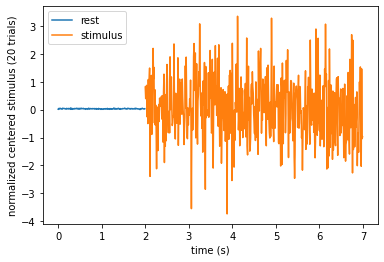

In [20]:
restTime = 2
stiTime = 5
trial = 85

plt.plot(T[:int(restTime/dt)], x[:int(restTime/dt)], label ='rest')
plt.plot(T[int(restTime/dt):int((restTime+stiTime)/dt)], x[int(restTime/dt):int((restTime+stiTime)/dt)], label ='stimulus')
plt.xlabel('time (s)')
plt.ylabel('normalized centered stimulus (20 trials)')
plt.legend()

In [21]:
# trial = 20
x_trial = [0]*trial
delayCorrection = [0]*trial
for i in range(trial):
    startTime = restTime+i*(restTime+stiTime)
    endTime = (i+1)*(restTime+stiTime)
    x_trial[i] = x[int(startTime/dt):int(endTime/dt)]
    if i == 0:
        center = np.argmax(np.correlate(x_trial[0], x_trial[0], 'same'))
    else:
        delayCorrection[i] = np.argmax(np.correlate(x_trial[i], x_trial[0], 'same'))-center

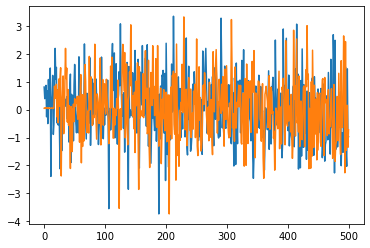

In [22]:
plt.plot(x_trial[0])
plt.plot(x_trial[-1])

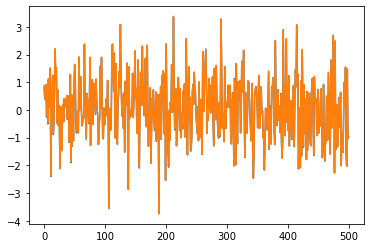

In [23]:
# delayCorrection
for i in [0,1]:
    startTime = restTime+i*(restTime+stiTime)+delayCorrection[i]*dt
    endTime = (i+1)*(restTime+stiTime)+delayCorrection[i]*dt
    plt.plot( x[int(startTime/dt):int(endTime/dt)] )

## Cut Trial (Stimulus)

In [34]:
Spike_Trial = [0]*trial
rstate_Trial = [0]*trial
for i in range(trial):
    startTime = restTime+i*(restTime+stiTime)+delayCorrection[i]*dt
    endTime = (i+1)*(restTime+stiTime)+delayCorrection[i]*dt
    try:
        Spike_Trial[i] = Spike[np.where(Spike>=startTime)[0][0]:np.where(Spike<endTime)[0][-1]]-startTime
        rstate_Trial[i], _ = np.histogram(Spike_Trial[i], np.arange(0,stiTime+dt,dt))
    except:
        Spike_Trial[i] = np.array([])

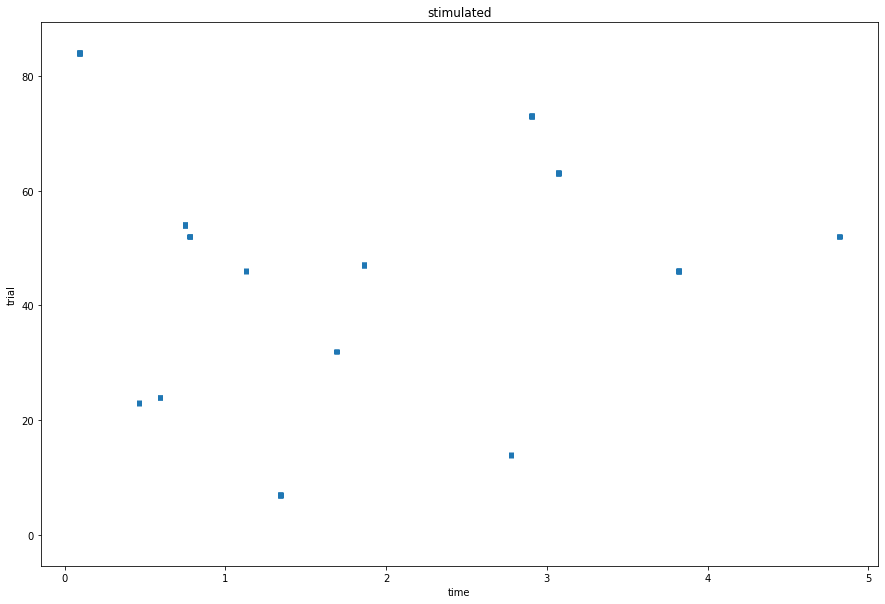

In [35]:
fig, ax = plt.subplots()
ax.eventplot(Spike_Trial, linewidths=5)
ax.set_title('stimulated')
ax.set_xlabel('time')
ax.set_ylabel('trial')
# ax.set_xlim(4,6)
fig.set_size_inches(15, 10)